In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import data_create
import IRM_3D_gibs_sampling

In [3]:
my_seed = 10

### create toy data

In [4]:

# data_num_per_cluster (X,Y,Z)
x_dim = 4
y_dim = 4
z_dim = 4

# set cluster_num for toy data
x_cluster_num = 4
y_cluster_num = 4
z_cluster_num = 4

# determine theta parameter as parameters of bernoulli distributions.
# ideal pattern
theta = np.zeros((x_cluster_num, y_cluster_num, z_cluster_num))
np.random.seed(my_seed)
p = 10
np.put(theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p, replace=False),1)


(16, 16, 16)


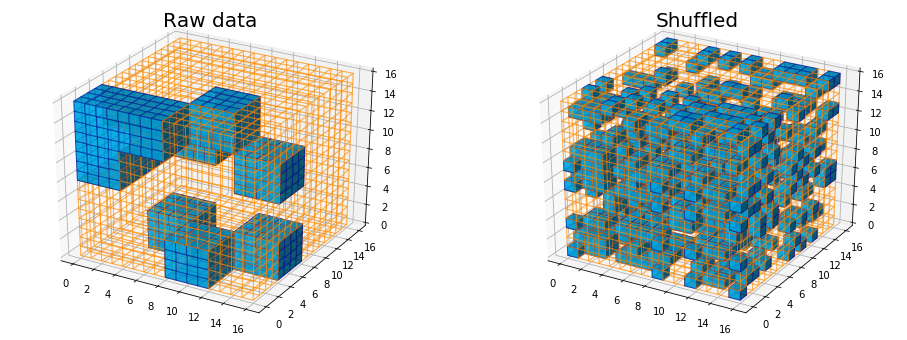

In [5]:
# it takes time for plotting 
np.random.seed(my_seed)
R =data_create.make_toy_data(x_dim=x_dim, y_dim=y_dim, z_dim=z_dim, theta=theta, plot_option='cube')
print(R.shape)

### gibbs sampling

In [6]:
# parameter of Dirichlet Process
alpha=2.0

# parameter of beta distribution
a=1.0
b=1.0

In [7]:
# inference
np.random.seed(my_seed)
max_sx, max_sy, max_sz, max_theta = IRM_3D_gibs_sampling.predict_S(R=R, alpha=alpha, a=a, b=b, iter_num=200, reset_iter_num=10)

 calculating... t=0  update S and theta : logP(sx, sy, sz, theta| R) =  -943.0719764756869
 calculating... t=1  update S and theta : logP(sx, sy, sz, theta| R) =  -148.15171320972667
 calculating... t=2  update S and theta : logP(sx, sy, sz, theta| R) =  -133.23190640066403
 calculating... t=199

In [8]:
predict_R = R[max_sx.argsort(),:,:][:, max_sy.argsort(),:][:, :, max_sz.argsort()]
sorted_sx = np.sort(max_sx)
sorted_sy = np.sort(max_sy)
sorted_sz = np.sort(max_sz)

### visualization

#### cube

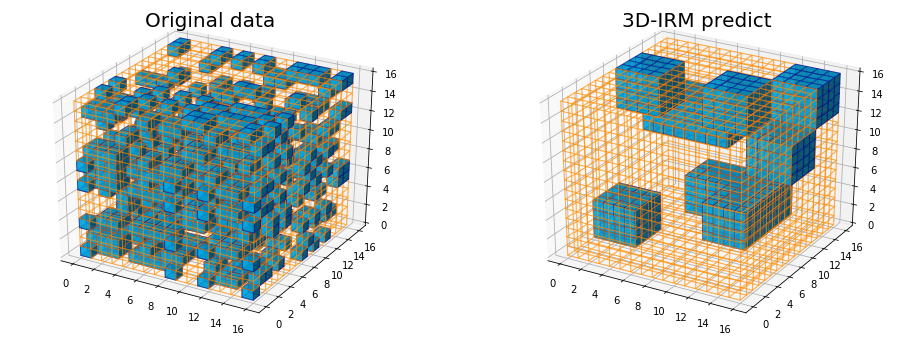

In [9]:
fig = plt.figure(figsize=(16,6))

colors = np.where(R==1,'#00bfffC0', '#00000000')
voxels1=R==1
voxels2=R==0

ax0 = fig.add_subplot(121, projection='3d')    
ax0 = fig.gca(projection='3d')
ax0.voxels(voxels1, facecolors=colors, edgecolor='#00008b73')
ax0.voxels(voxels2, facecolors=colors, edgecolor='#ff8c0073')
ax0.set_title("Original data", fontsize=20)

colors = np.where(predict_R==1,'#00bfffC0', '#00000000')
voxels1=predict_R==1
voxels2=predict_R==0

ax1 = fig.add_subplot(122, projection='3d')    
ax1 = fig.gca(projection='3d')
ax1.voxels(voxels1, facecolors=colors, edgecolor='#00008b73')
ax1.voxels(voxels2, facecolors=colors, edgecolor='#ff8c0073')
ax1.set_title("3D-IRM predict", fontsize=20);

## noisy data

#### create toy data

In [10]:
# noisy pattern(close to real data)
noisy_theta = np.zeros((x_cluster_num, y_cluster_num, z_cluster_num))
np.random.seed(my_seed)
p1 = 10
p0 = 10
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p1, replace=False),0.8)
np.put(noisy_theta, np.random.choice(range(x_cluster_num * y_cluster_num * z_cluster_num), p0, replace=False),0.2)

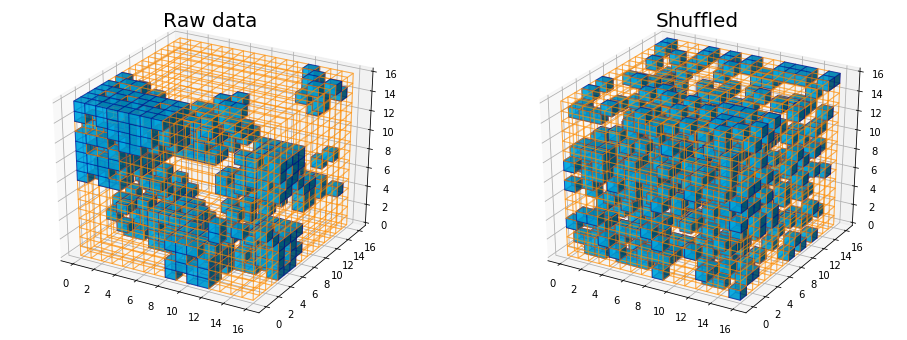

In [11]:
np.random.seed(my_seed)
R_noisy =data_create.make_toy_data(x_dim=x_dim, y_dim=y_dim, z_dim=z_dim, theta=noisy_theta, plot_option='cube')

#### gibbs sampling

In [12]:
# inference
np.random.seed(my_seed)
max_sx_noisy, max_sy_noisy, max_sz_noisy, max_theta_noisy = IRM_3D_gibs_sampling.predict_S(R=R_noisy, alpha=alpha, a=a, b=b, iter_num=500, reset_iter_num=15)

 calculating... t=0  update S and theta : logP(sx, sy, sz, theta| R) =  -1182.536161007831
 calculating... t=2  update S and theta : logP(sx, sy, sz, theta| R) =  -945.8365567406231
 calculating... t=62  update S and theta : logP(sx, sy, sz, theta| R) =  -899.2885524722965
 calculating... t=108  update S and theta : logP(sx, sy, sz, theta| R) =  -892.2142271558436
 calculating... t=137  update S and theta : logP(sx, sy, sz, theta| R) =  -786.1681772840437
 calculating... t=287  update S and theta : logP(sx, sy, sz, theta| R) =  -725.4651412226982
 calculating... t=499

In [13]:
predict_R_noisy = R_noisy[max_sx_noisy.argsort(),:,:][:, max_sy_noisy.argsort(),:][:, :, max_sz_noisy.argsort()]
sorted_sx_noisy = np.sort(max_sx_noisy)
sorted_sy_noisy = np.sort(max_sy_noisy)
sorted_sz_noisy = np.sort(max_sz_noisy)

### visualization

#### cube

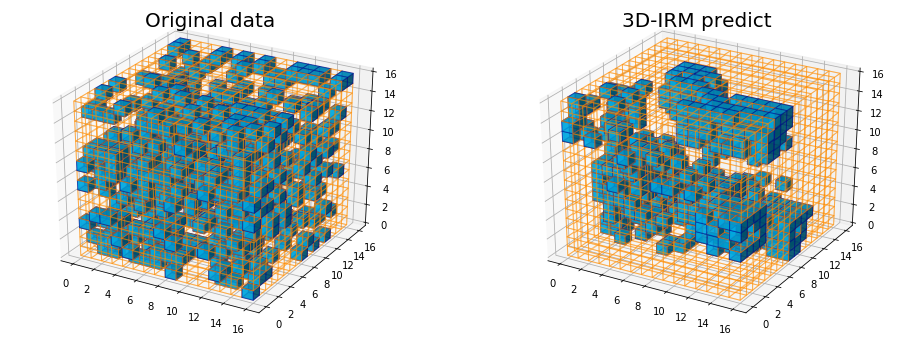

In [14]:
fig = plt.figure(figsize=(16,6))

colors = np.where(R_noisy==1,'#00bfffC0', '#00000000')
voxels1=R_noisy==1
voxels2=R_noisy==0

ax0 = fig.add_subplot(121, projection='3d')    
ax0 = fig.gca(projection='3d')
ax0.voxels(voxels1, facecolors=colors, edgecolor='#00008b73')
ax0.voxels(voxels2, facecolors=colors, edgecolor='#ff8c0073')
ax0.set_title("Original data", fontsize=20)

colors = np.where(predict_R_noisy==1,'#00bfffC0', '#00000000')
voxels1=predict_R_noisy==1
voxels2=predict_R_noisy==0

ax1 = fig.add_subplot(122, projection='3d')    
ax1 = fig.gca(projection='3d')
ax1.voxels(voxels1, facecolors=colors, edgecolor='#00008b73')
ax1.voxels(voxels2, facecolors=colors, edgecolor='#ff8c0073')
ax1.set_title("3D-IRM predict", fontsize=20);

In [15]:
print(max_theta.shape)

(4, 4, 4)


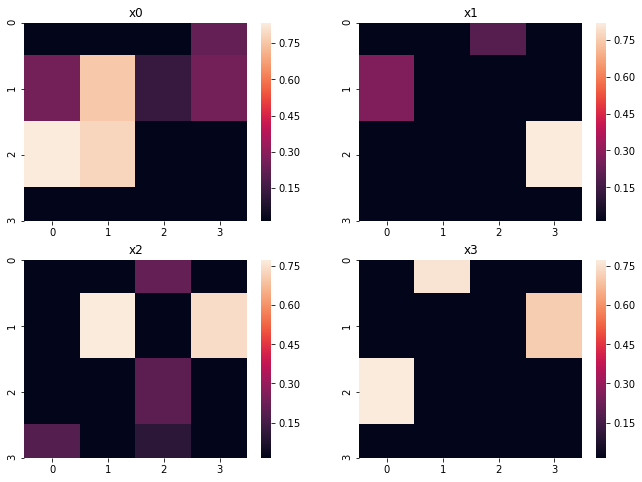

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,8))
for i, matrix in enumerate(max_theta_noisy):
    sns.heatmap(matrix, ax=ax[int(i/2), i%2])
    ax[int(i/2), i%2].set_title('x{}'.format(i))